In [ ]:
# Imports & Configs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
#from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
#from xgboost import XGBClassifier
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tqdm import tqdm


In [4]:
tdata=pd.read_csv("/home/vinod/projects_1/KDD_END_2_END/data/KDDTest_.csv")

In [2]:
trdata=pd.read_csv("/home/vinod/projects_1/KDD_END_2_END/data/KDDTrain_.csv")

In [3]:
trdata.shape

(25192, 42)

In [4]:
trdata.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
# Features Engineering

In [6]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','dst_host_rerror_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','srv_diff_host_rate','dst_host_srv_rerror_rate','class'])

In [7]:
trdata.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Assigning name for columns

In [9]:
trdata.columns = columns

In [10]:
trdata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,srv_diff_host_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
trdata.shape

(25192, 42)

In [12]:
trdata['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [13]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [13]:
trdata.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,srv_diff_host_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# trdata.groupby('class').mean()

In [15]:
trdata.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [16]:
print('Class distribution Training set:')
print(trdata['class'].value_counts())


Class distribution Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [ ]:
trdata['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [ ]:
# Data cleaning

In [17]:
total = trdata.shape[0]
missing_columns = [col for col in trdata.columns if trdata[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = trdata[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [18]:
print(f"Number of duplicate rows: {trdata.duplicated().sum()}")

Number of duplicate rows: 0


In [19]:
trdata.loc[trdata['class'] == "normal", "class"] = 'normal'
trdata.loc[trdata['class'] != 'normal', "class"] = 'anomaly'


In [20]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

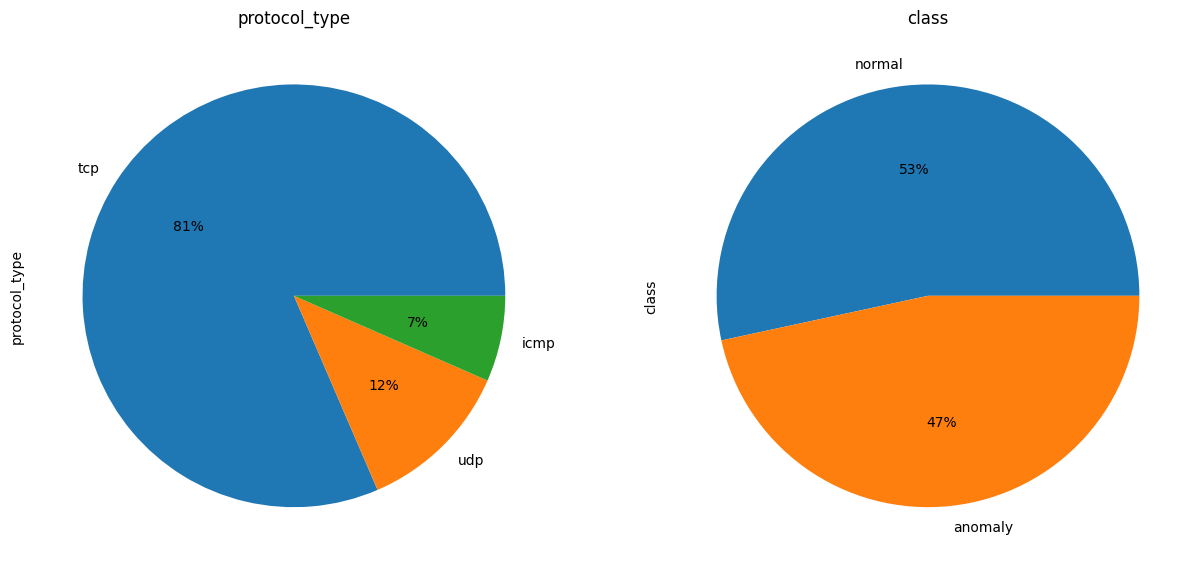

In [21]:
pie_plot(trdata, ['protocol_type', 'class'], 1, 2)

In [ ]:
# Data Correlation
# Transforming class label column to a binary (where 0 is normal and 1 for anomaly)
# Pearson correlation matrix plot of the dataset

<Axes: >

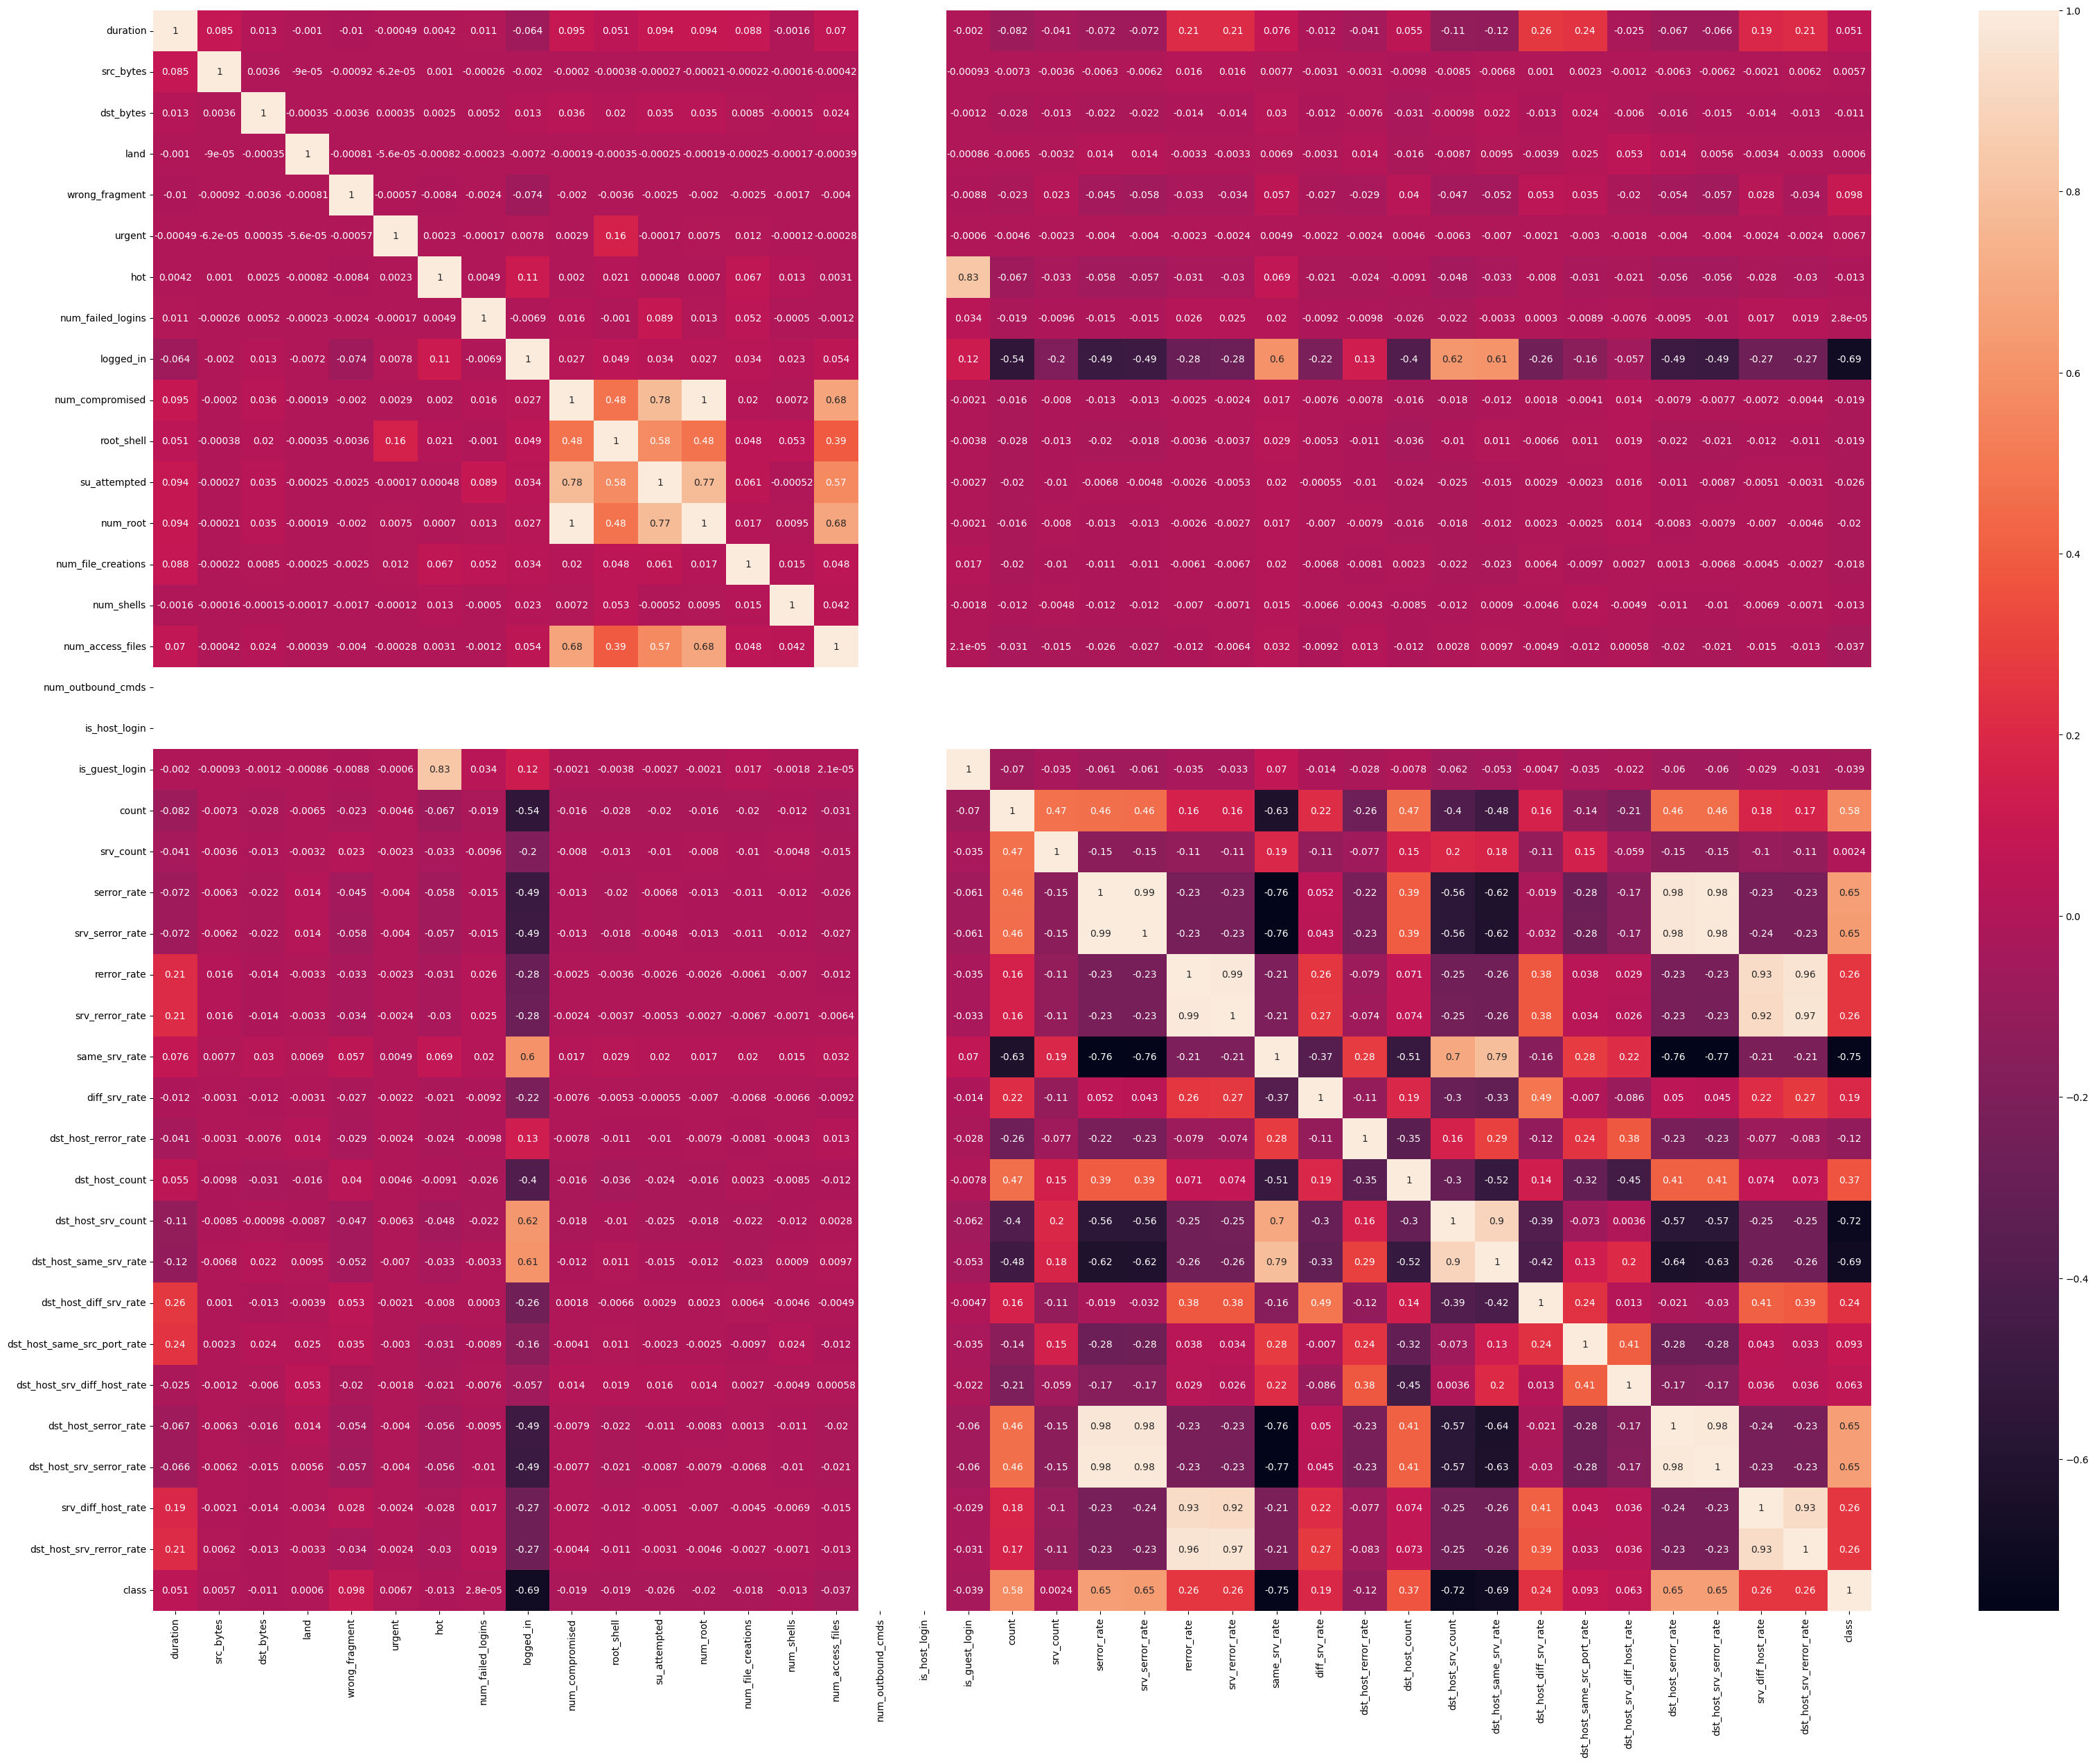

In [22]:
categorical_columns = ['service', 'protocol_type', 'flag']
trdata['class'] = trdata['class'].apply(lambda x: 0 if x=="normal" else 1)
plt.figure(figsize=(40,30))
sns.heatmap(trdata.drop(categorical_columns, axis=1).corr(), annot=True)

In [ ]:
# one-hot encoding

In [23]:
trdata = trdata.join(pd.get_dummies(trdata.loc[:, categorical_columns]))
trdata = trdata.drop(categorical_columns, axis=1)

In [14]:
trdata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,srv_diff_host_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [15]:
trdata.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,srv_diff_host_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Data pre-processing

In [17]:
# Dataset Partitioning Split, train & test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(trdata.drop(['class'], axis=1), trdata['class'], test_size=0.2, random_state=10)

In [ ]:
# Principal Component Analysis Scaling & data normalizing

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [51]:
print (x_test_norm)

[[-0.11338355 -0.0104047  -0.03905778 ... -0.02440901 -1.21219956
  -0.04171014]
 [-0.11338355 -0.00880259 -0.03905778 ... -0.02440901  0.82494668
  -0.04171014]
 [-0.1130164  -0.009349   -0.03467923 ... -0.02440901  0.82494668
  -0.04171014]
 ...
 [-0.11338355 -0.01039431 -0.03905778 ... -0.02440901  0.82494668
  -0.04171014]
 [-0.11338355 -0.01028332 -0.02852301 ... -0.02440901  0.82494668
  -0.04171014]
 [-0.11338355 -0.0104047  -0.03905778 ... -0.02440901 -1.21219956
  -0.04171014]]


In [ ]:
# Component reduction
# Feature selection, Variance ratio 11 of 119
# Heat map Correlation matrix of new feature

In [28]:
pca = PCA(n_components = 11)

x_train = pca.fit_transform(x_train_norm)
x_test = pca.transform(x_test_norm)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.08330829, 0.05249024, 0.03541545, 0.03207715, 0.02590172,
       0.02267399, 0.0190252 , 0.01507787, 0.01380104, 0.01223981,
       0.01096465])

In [29]:
trdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

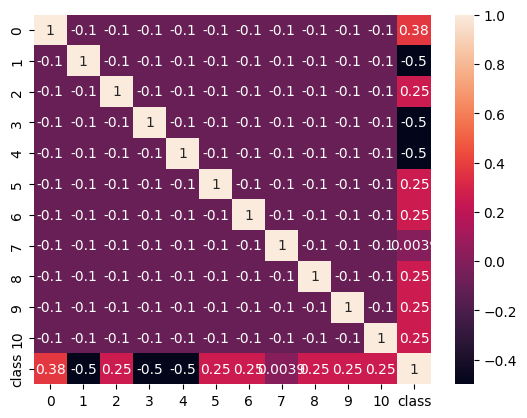

In [30]:
trdata_PCA = pd.DataFrame(x_train).corr()
trdata_PCA['class'] = y_train
sns.heatmap(trdata_PCA.corr(), annot=True)

In [ ]:
# Scatter plot of first two PCA

Text(0, 0.5, 'Second PCA Component')

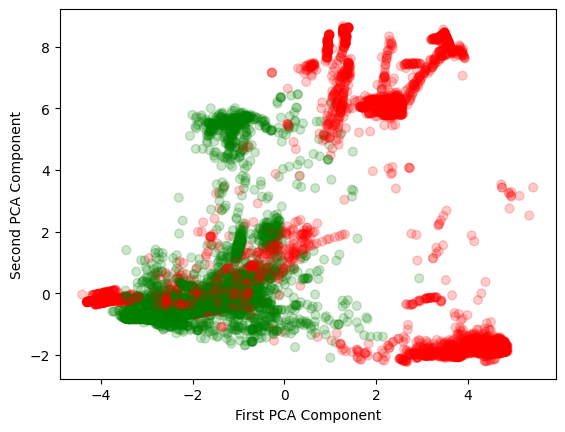

In [37]:
x = list(map(lambda x: x[0], x_train))
y = list(map(lambda x: x[1], x_train))
z = list(map(lambda x: x[2], x_train))
labels = y_train
colors = matplotlib.colors.ListedColormap(['green','red'])
plt.scatter(x,y, c=labels, cmap=colors, alpha=0.2, s=40)
plt.xlabel("First PCA Component")
plt.ylabel("Second PCA Component")

In [ ]:
# 3D scatter plot: First three PCA Component

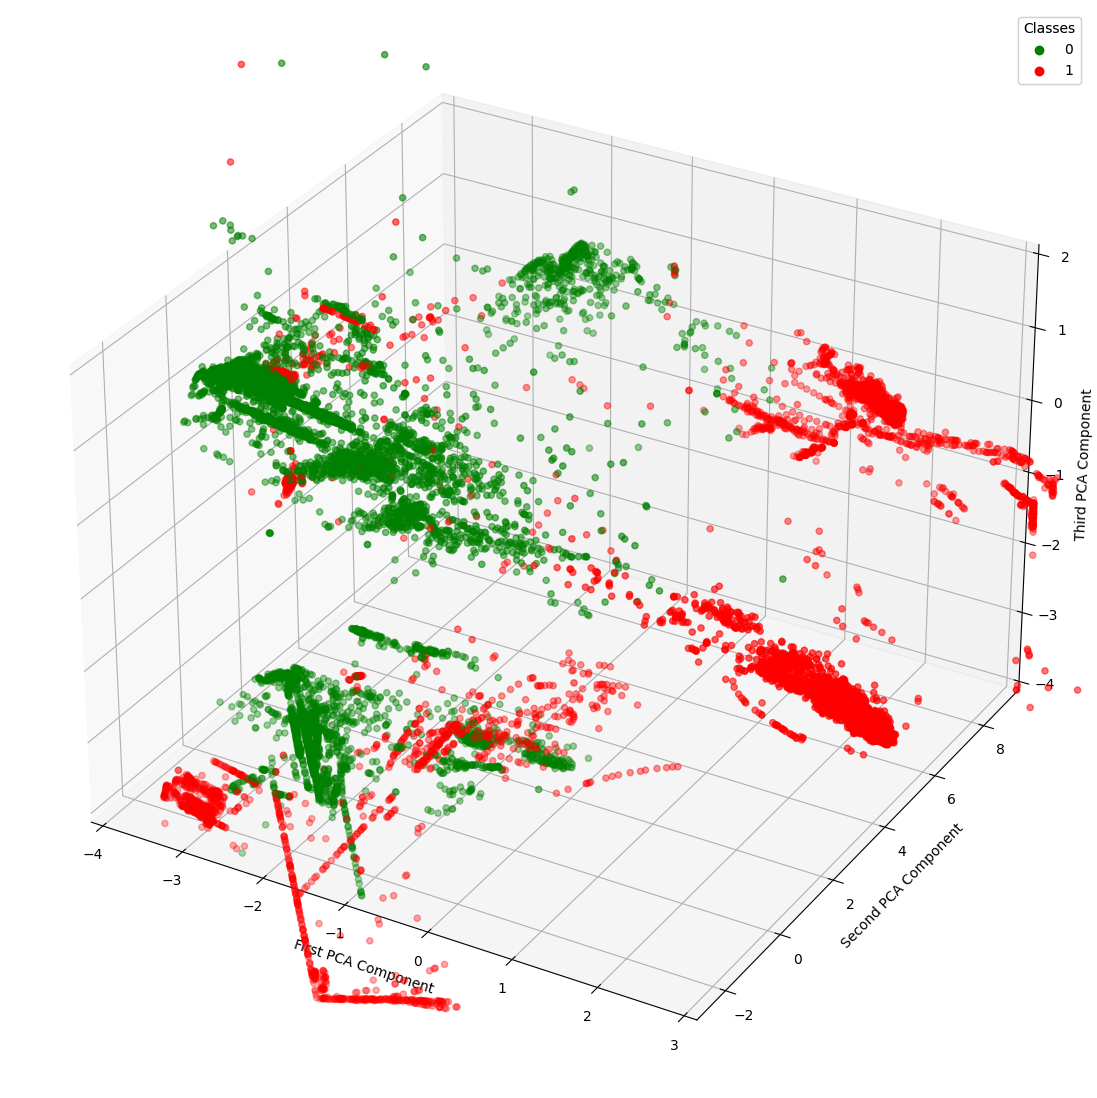

In [38]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')
labels = y_train

# Creating plot
scatter = ax.scatter3D(x, y, z, c=labels, cmap=colors)
ax.set_zlim(-4,2)
ax.set_xlim(-4,3)
ax.set_xlabel("First PCA Component")
ax.set_ylabel("Second PCA Component")
ax.set_zlabel("Third PCA Component")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.show()

In [ ]:
# Modeling

In [39]:
def print_error_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    prc = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print('Accuracy: {:.5f}'.format(acc))
    print('Precision: {:.5f}'.format(prc))
    print('F1 Score: {:.5f}'.format(f1))

In [40]:
Lrgression = LogisticRegression().fit(x_train, y_train)
y_pred = Lrgression.predict(x_test)
print_error_metrics(y_test, y_pred)

Accuracy: 0.96249
Precision: 0.96766
F1 Score: 0.95959


In [41]:
Knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
y_pred = Lrgression.predict(x_test)
print_error_metrics(y_test, y_pred)

Accuracy: 0.96249
Precision: 0.96766
F1 Score: 0.95959


In [42]:
Dctr = DecisionTreeClassifier(max_depth=None)
Dctr.fit(x_train, y_train)
print("Decision tree maximum depth:", Dctr.tree_.max_depth)
y_pred = Dctr.predict(x_test)
print_error_metrics(y_test, y_pred)

Decision tree maximum depth: 19
Accuracy: 0.99008
Precision: 0.98940
F1 Score: 0.98940


In [43]:
models = {}
models['KNeighborsClassifier']= Knn
models['LogisticRegression']= Lrgression
models['DecisionTreeClassifier']= Dctr

In [44]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[2660   21]
 [  21 2337]]
---------------
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      2681
     anamoly       0.99      0.99      0.99      2358

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

**************** LogisticRegression Model Testing ****************
[[2606   75]
 [ 114 2244]]
----------------
              precision    recall  f1-score   support

      normal       0.96      0.97      0.97      2681
     anamoly       0.97      0.95      0.96      2358

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039

************** DecisionTreeClassifier Model Testing **************
[[2655   26]
 [  25 2333]]
--------------
              pr

<Axes: >

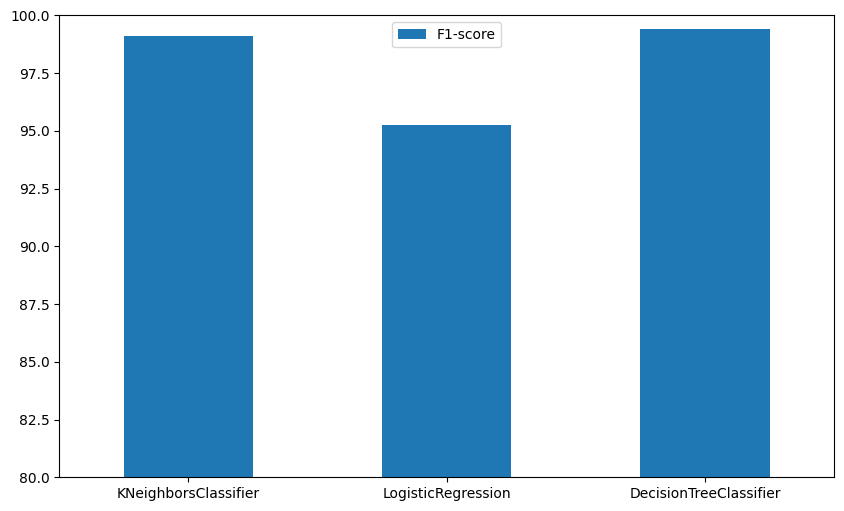

In [ ]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [ ]:
import pickle

In [ ]:
filename = 'LR_model.sav'
pickle.dump(Lrgression, open(filename, 'wb'))

In [55]:
trdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
